### Image classification using vgg16 without transfer learning

### Step 1: Importing Libraries 

In [0]:
#importing libraries 

import tensorflow as tf
import os
import sklearn.datasets
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.datasets import cifar10
#import zipfile
from keras import optimizers
from keras.applications import VGG16
%matplotlib inline
import random
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


### Step 2: Mounting Google drive 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Path where whole data set lies 
base_dir = '/content/gdrive/My Drive/Assignment2-13663024/flower_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

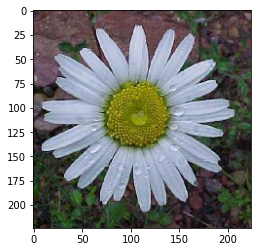

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
img_path1 = '/content/gdrive/My Drive/Assignment2-13663024/flower_dataset/train/Daisy/image_0815.jpg'
img_1 = image.load_img(img_path1, target_size=(224,224))
ax1.imshow(img_1)
x = image.img_to_array(img_1)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)



# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir , # This is the source directory for training images
        target_size= (224,224),  # All images will be resized to 150x150
        batch_size=20,
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224,224),
        batch_size=20,
        class_mode='categorical')



Found 680 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


### Creating base model for vgg from scratch

In [0]:
#Base_model from scratch for vgg16

from keras.layers import Convolution2D as Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
model_VGG16 = Sequential()

model_VGG16.add(Conv2D(64, (3, 3),input_shape=(224, 224, 3), activation='relu', padding='same'))
model_VGG16.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_VGG16.add(MaxPooling2D(pool_size=(2, 2)))


model_VGG16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGG16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGG16.add(MaxPooling2D(pool_size=(2, 2)))


# Part 2
model_VGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16.add(MaxPooling2D(pool_size=(2, 2)))


# Conv Block 4
model_VGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16.add(MaxPooling2D(pool_size=(2, 2)))


# Block 5
model_VGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16.add(MaxPooling2D(pool_size=(2, 2)))

# FC layers
model_VGG16.add(Flatten())
model_VGG16.add(Dense(4096, activation='relu'))
model_VGG16.add(Dense(4096, activation='relu'))
model_VGG16.add(Dense(17, activation='softmax'))

In [0]:
model_VGG16.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [0]:
#compiling the model
model_VGG16.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# Base model with 100 epochs 
history2 = model_VGG16.fit_generator(
      train_generator,
      steps_per_epoch=34,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps=17,  
      verbose=2)

Epoch 1/100
 - 170s - loss: 3.1390 - acc: 0.0706 - val_loss: 2.8226 - val_acc: 0.1353
Epoch 2/100
 - 8s - loss: 2.6665 - acc: 0.1088 - val_loss: 2.2326 - val_acc: 0.1588
Epoch 3/100
 - 8s - loss: 2.3936 - acc: 0.1691 - val_loss: 2.0845 - val_acc: 0.2088
Epoch 4/100
 - 8s - loss: 2.1265 - acc: 0.2662 - val_loss: 2.3667 - val_acc: 0.2765
Epoch 5/100
 - 8s - loss: 1.9635 - acc: 0.3324 - val_loss: 2.2699 - val_acc: 0.2765
Epoch 6/100
 - 8s - loss: 1.7202 - acc: 0.4176 - val_loss: 2.0287 - val_acc: 0.3235
Epoch 7/100
 - 8s - loss: 1.4930 - acc: 0.4735 - val_loss: 1.6118 - val_acc: 0.3294
Epoch 8/100
 - 8s - loss: 1.2125 - acc: 0.5926 - val_loss: 1.6709 - val_acc: 0.4029
Epoch 9/100
Epoch 10/100
 - 8s - loss: 0.5106 - acc: 0.8324 - val_loss: 3.2704 - val_acc: 0.4029
Epoch 11/100
 - 8s - loss: 0.3190 - acc: 0.9088 - val_loss: 2.9280 - val_acc: 0.4059
Epoch 12/100
 - 8s - loss: 0.2071 - acc: 0.9382 - val_loss: 2.9847 - val_acc: 0.4088
Epoch 13/100
 - 8s - loss: 0.2288 - acc: 0.9324 - val_loss:

### Step: Visualization of result for base model from scratch 

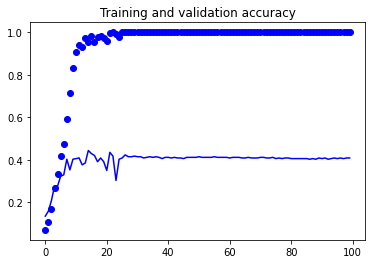

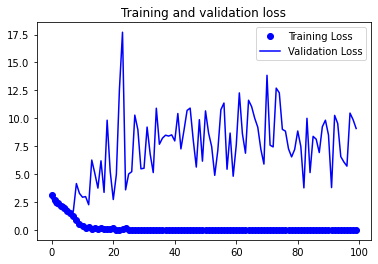

In [0]:
#visualisation with 10 epochs 

import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_datagen = ImageDataGenerator(rescale=1/255) 

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224,224),
        batch_size=20,
        class_mode='categorical')

Found 340 images belonging to 17 classes.


In [0]:

model_VGG16.evaluate(
      test_generator)


17/17 [==============================] - 80s 5s/step


[5.428638935089111, 0.47058823704719543]

### Customization of baseline vgg-16 architecture 

In [0]:
# Data_augmentation and drop outs
# Customization 1 Experimental Settings 


from keras.layers import Convolution2D as Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
model_VGG16_aug = Sequential()

model_VGG16_aug.add(Conv2D(64, (3, 3),input_shape=(224, 224, 3), activation='relu', padding='same'))
model_VGG16_aug.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_VGG16_aug.add(MaxPooling2D(pool_size=(2, 2)))


model_VGG16_aug.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGG16_aug.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGG16_aug.add(MaxPooling2D(pool_size=(2, 2)))


# Part 2
model_VGG16_aug.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16_aug.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16_aug.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16_aug.add(MaxPooling2D(pool_size=(2, 2)))


# Conv Block 4
model_VGG16_aug.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_VGG16_aug.add(Dropout(0.5)) # First customisation 1

# Block 5
model_VGG16_aug.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_VGG16_aug.add(Dropout(0.5)) # First customisation 1

# FC layers
model_VGG16_aug.add(Flatten())
model_VGG16_aug.add(Dense(4096, activation='relu'))
model_VGG16_aug.add(Dropout(0.5)) #First customisation 1
model_VGG16_aug.add(Dense(4096, activation='relu'))
model_VGG16_aug.add(Dense(17, activation='softmax'))

Using TensorFlow backend.


In [0]:
# Image augmentation done to train data set
# customisation 1 Experimental Results 
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(224, 224), 
        batch_size=20,
       
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 680 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


In [0]:
#compiling the customized model 
model_VGG16_aug.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# customized model with 100 epochs 
history_aug = model_VGG16_aug.fit_generator(
      train_generator,
      steps_per_epoch=34,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps=17,  
      verbose=2)

Epoch 1/100
 - 557s - loss: 2.8375 - acc: 0.0441 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 2/100
 - 18s - loss: 2.8366 - acc: 0.0353 - val_loss: 2.8336 - val_acc: 0.0588
Epoch 3/100
 - 18s - loss: 2.9629 - acc: 0.0676 - val_loss: 2.5012 - val_acc: 0.1147
Epoch 4/100
 - 18s - loss: 2.6047 - acc: 0.1088 - val_loss: 2.5932 - val_acc: 0.1147
Epoch 5/100
 - 19s - loss: 2.5368 - acc: 0.1544 - val_loss: 2.2299 - val_acc: 0.1588
Epoch 6/100
 - 19s - loss: 2.4929 - acc: 0.0912 - val_loss: 2.3029 - val_acc: 0.1471
Epoch 7/100
 - 19s - loss: 2.4088 - acc: 0.1412 - val_loss: 2.1843 - val_acc: 0.2059
Epoch 8/100
 - 19s - loss: 2.3754 - acc: 0.2015 - val_loss: 2.4713 - val_acc: 0.1912
Epoch 9/100
 - 19s - loss: 2.2789 - acc: 0.2162 - val_loss: 2.0560 - val_acc: 0.2324
Epoch 10/100
 - 19s - loss: 2.1996 - acc: 0.2279 - val_loss: 1.9659 - val_acc: 0.2559
Epoch 11/100
 - 19s - loss: 2.1898 - acc: 0.2471 - val_loss: 2.0184 - val_acc: 0.3118
Epoch 12/100
 - 19s - loss: 2.0480 - acc: 0.2529 - val_loss: 2

### Step: Visualization of result for base model from scratch 

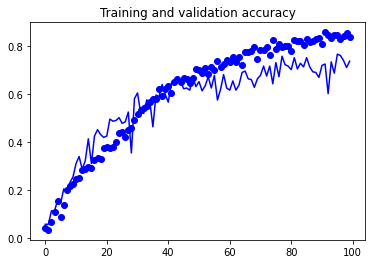

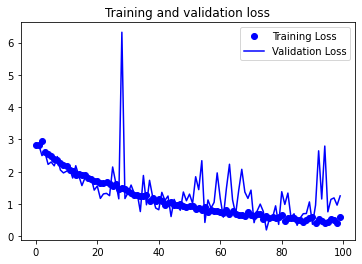

In [0]:
#visualisation with 100 epochs 

import matplotlib.pyplot as plt
acc = history_aug.history['acc']
val_acc = history_aug.history['val_acc']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:

model_VGG16_aug.evaluate(
      test_generator)


17/17 [==============================] - 235s 14s/step


[0.8215664625167847, 0.8117647171020508]

In [0]:

# Customisation 2 Experimental results
# Data_augmentation and drop outs


from keras.layers import Convolution2D as Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
model_VGG16_aug1 = Sequential()

model_VGG16_aug1.add(Conv2D(64, (3, 3),input_shape=(224, 224, 3), activation='relu', padding='same'))
model_VGG16_aug1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_VGG16_aug1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))#customisation_2
model_VGG16_aug1.add(MaxPooling2D(pool_size=(2, 2)))


model_VGG16_aug1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGG16_aug1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGG16_aug1.add(MaxPooling2D(pool_size=(2, 2)))


# Part 2
model_VGG16_aug1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16_aug1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16_aug1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16_aug1.add(MaxPooling2D(pool_size=(2, 2)))
model_VGG16_aug1.add(Dropout(0.5))#customisation_2

# Conv Block 4
model_VGG16_aug1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug1.add(MaxPooling2D(pool_size=(2, 2)))
model_VGG16_aug1.add(Dropout(0.5))#cust_1

# Block 5
model_VGG16_aug1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug1.add(MaxPooling2D(pool_size=(2, 2)))
model_VGG16_aug1.add(Dropout(0.5)) #cust_1

# FC layers
model_VGG16_aug1.add(Flatten())
model_VGG16_aug1.add(Dense(4096, activation='relu'))
model_VGG16_aug1.add(Dropout(0.5))#cust 1
model_VGG16_aug1.add(Dense(4096, activation='relu'))
model_VGG16_aug1.add(Dense(17, activation='softmax'))

In [0]:
model_VGG16_aug1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)      

In [0]:
# Image augmentation

# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(224, 224), 
        batch_size=20,
       
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 680 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


In [0]:
#compiling the model customized model 
model_VGG16_aug1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# customized model with 100 epochs 
history_aug1 = model_VGG16_aug1.fit_generator(
      train_generator,
      steps_per_epoch=34,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps=17,  
      verbose=2)

Epoch 1/100
 - 22s - loss: 2.9073 - acc: 0.0471 - val_loss: 2.8334 - val_acc: 0.0588
Epoch 2/100
 - 21s - loss: 2.8342 - acc: 0.0441 - val_loss: 2.8337 - val_acc: 0.0588
Epoch 3/100
 - 21s - loss: 2.8335 - acc: 0.0441 - val_loss: 2.8252 - val_acc: 0.0588
Epoch 4/100
 - 21s - loss: 2.7880 - acc: 0.0794 - val_loss: 2.6166 - val_acc: 0.1118
Epoch 5/100
 - 21s - loss: 2.6297 - acc: 0.1059 - val_loss: 2.4031 - val_acc: 0.1353
Epoch 6/100
 - 21s - loss: 2.5089 - acc: 0.1485 - val_loss: 2.3492 - val_acc: 0.2000
Epoch 7/100
 - 21s - loss: 2.4477 - acc: 0.1632 - val_loss: 2.2161 - val_acc: 0.1588
Epoch 8/100
 - 21s - loss: 2.3924 - acc: 0.1397 - val_loss: 2.2935 - val_acc: 0.1471
Epoch 9/100
 - 21s - loss: 2.3096 - acc: 0.1765 - val_loss: 2.1476 - val_acc: 0.2265
Epoch 10/100
 - 21s - loss: 2.3083 - acc: 0.1662 - val_loss: 1.8303 - val_acc: 0.2235
Epoch 11/100
 - 21s - loss: 2.2042 - acc: 0.2088 - val_loss: 1.9953 - val_acc: 0.2441
Epoch 12/100
 - 21s - loss: 2.1839 - acc: 0.1941 - val_loss: 2.

### Step: Visualization of result 

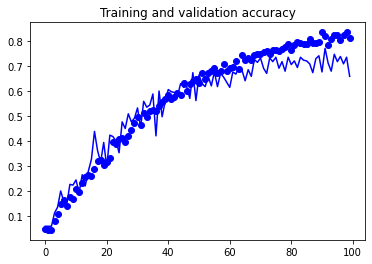

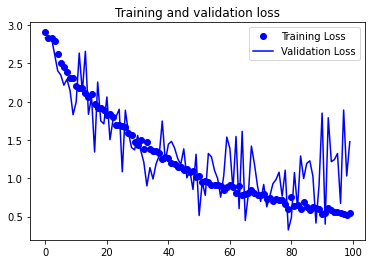

In [0]:
#visualisation with 100 epochs 

import matplotlib.pyplot as plt
acc = history_aug1.history['acc']
val_acc = history_aug1.history['val_acc']
loss = history_aug1.history['loss']
val_loss = history_aug1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_datagen = ImageDataGenerator(rescale=1/255) 

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224,224),
        batch_size=20,
        class_mode='categorical')

Found 340 images belonging to 17 classes.


In [0]:
model_VGG16_aug1.evaluate(
      test_generator)

17/17 [==============================] - 3s 175ms/step


[0.3512718081474304, 0.7647058963775635]

In [0]:
# Final customized Best model 
#Customisation 3 Experimental settings 
# Data_augmentation and drop outs


from keras.layers import Convolution2D as Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
model_VGG16_aug2 = Sequential()

# Conv Block 1
model_VGG16_aug2.add(Conv2D(64, (3, 3),input_shape=(224, 224, 3), activation='relu', padding='same'))
model_VGG16_aug2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_VGG16_aug2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))#customisation_2
model_VGG16_aug2.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Block 2
model_VGG16_aug2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGG16_aug2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGG16_aug2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))#customisation_3
model_VGG16_aug2.add(MaxPooling2D(pool_size=(2, 2)))
model_VGG16_aug2.add(Dropout(0.5))#customisation_3

# Conv Block 3
model_VGG16_aug2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16_aug2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16_aug2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16_aug2.add(MaxPooling2D(pool_size=(2, 2)))
model_VGG16_aug2.add(Dropout(0.5))#customisation_2

# Conv Block 4
model_VGG16_aug2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug2.add(MaxPooling2D(pool_size=(2, 2)))
model_VGG16_aug2.add(Dropout(0.5))#cust_1

# Block 5
model_VGG16_aug2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug2.add(MaxPooling2D(pool_size=(2, 2)))
model_VGG16_aug2.add(Dropout(0.5)) #cust_1

# FC layers
model_VGG16_aug2.add(Flatten())
model_VGG16_aug2.add(Dense(4096, activation='relu'))
model_VGG16_aug2.add(Dropout(0.5))#cust 1
model_VGG16_aug2.add(Dense(4096, activation='relu'))
model_VGG16_aug2.add(Dense(17, activation='softmax'))

In [0]:
model_VGG16_aug2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 64)     

In [0]:
# Image augmentation

# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(224, 224), 
        batch_size=20,
       
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 680 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


In [0]:
#compiling the model customized model 
model_VGG16_aug2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# customized model with 100 epochs 
history_aug2 = model_VGG16_aug2.fit_generator(
      train_generator,
      steps_per_epoch=34,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps=17,  
      verbose=2)

Epoch 1/100
 - 313s - loss: 2.8367 - acc: 0.0426 - val_loss: 2.8328 - val_acc: 0.0588
Epoch 2/100
 - 35s - loss: 2.8343 - acc: 0.0324 - val_loss: 2.8330 - val_acc: 0.0588
Epoch 3/100
 - 35s - loss: 2.9810 - acc: 0.0618 - val_loss: 2.7987 - val_acc: 0.1324
Epoch 4/100
 - 35s - loss: 2.7766 - acc: 0.0971 - val_loss: 2.4077 - val_acc: 0.1176
Epoch 5/100
 - 35s - loss: 2.6003 - acc: 0.1118 - val_loss: 2.7720 - val_acc: 0.1147
Epoch 6/100
 - 35s - loss: 2.5196 - acc: 0.1221 - val_loss: 2.7199 - val_acc: 0.1000
Epoch 7/100
 - 35s - loss: 2.4063 - acc: 0.1206 - val_loss: 2.2675 - val_acc: 0.1235
Epoch 8/100
 - 35s - loss: 2.3895 - acc: 0.1647 - val_loss: 2.3197 - val_acc: 0.1765
Epoch 9/100
 - 35s - loss: 2.3427 - acc: 0.1691 - val_loss: 2.5733 - val_acc: 0.1235
Epoch 10/100
 - 35s - loss: 2.2177 - acc: 0.2074 - val_loss: 2.6180 - val_acc: 0.2235
Epoch 11/100
 - 35s - loss: 2.1294 - acc: 0.2221 - val_loss: 2.1789 - val_acc: 0.2824
Epoch 12/100
 - 35s - loss: 2.0997 - acc: 0.2471 - val_loss: 2

### Step: Visualization of result 


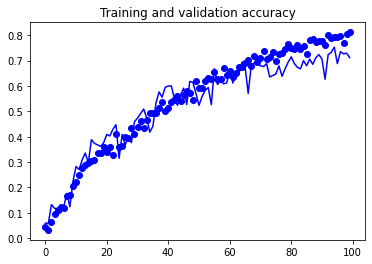

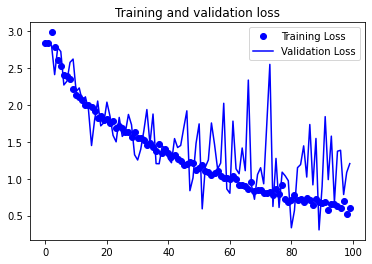

In [0]:
#visualisation with 100 epochs 

import matplotlib.pyplot as plt
acc = history_aug2.history['acc']
val_acc = history_aug2.history['val_acc']
loss = history_aug2.history['loss']
val_loss = history_aug2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_datagen = ImageDataGenerator(rescale=1/255) 

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224,224),
        batch_size=20,
        class_mode='categorical')

Found 340 images belonging to 17 classes.


In [0]:
model_VGG16_aug2.evaluate(
      test_generator)

17/17 [==============================] - 130s 8s/step


[0.4543994963169098, 0.800000011920929]

In [0]:

# customization_4 but not mentioned in Experimental setting report 
# Data_augmentation and drop outs


from keras.layers import Convolution2D as Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
model_VGG16_aug3 = Sequential()

model_VGG16_aug3.add(Conv2D(64, (3, 3),input_shape=(224, 224, 3), activation='relu', padding='same'))
model_VGG16_aug3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_VGG16_aug3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))#customisation_2
model_VGG16_aug3.add(MaxPooling2D(pool_size=(2, 2)))


model_VGG16_aug3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGG16_aug3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGG16_aug3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))#customisation_3
model_VGG16_aug3.add(MaxPooling2D(pool_size=(2, 2)))
model_VGG16_aug3.add(Dropout(0.5))#customisation_3

# Part 2
model_VGG16_aug3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16_aug3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16_aug3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGG16_aug3.add(MaxPooling2D(pool_size=(2, 2)))
model_VGG16_aug3.add(Dropout(0.5))#customisation_2

# Conv Block 4
model_VGG16_aug3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug3.add(MaxPooling2D(pool_size=(2, 2)))
model_VGG16_aug3.add(Dropout(0.5))#cust_1

# Block 5
model_VGG16_aug3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_VGG16_aug3.add(MaxPooling2D(pool_size=(2, 2)))
model_VGG16_aug3.add(Dropout(0.5)) #cust_1

# FC layers
model_VGG16_aug3.add(Flatten())
model_VGG16_aug3.add(Dense(4096, activation='relu'))
model_VGG16_aug3.add(Dropout(0.5))#cust 1
model_VGG16_aug3.add(Dense(4096, activation='relu'))
model_VGG16_aug3.add(Dense(17, activation='softmax'))

In [0]:
# Image augmentation

# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(224, 224), 
        batch_size=20,
       
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 680 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


In [0]:
#compiling the model customized model 
model_VGG16_aug3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# customized model with 100 epochs 
history_aug3 = model_VGG16_aug3.fit_generator(
      train_generator,
      steps_per_epoch=34,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps=17,  
      verbose=2)

Epoch 1/100
 - 504s - loss: 2.8322 - acc: 0.0471 - val_loss: 2.8331 - val_acc: 0.0588
Epoch 2/100
 - 37s - loss: 2.8260 - acc: 0.0500 - val_loss: 2.8331 - val_acc: 0.0588
Epoch 3/100
 - 37s - loss: 2.8339 - acc: 0.0382 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 4/100
 - 37s - loss: 2.8339 - acc: 0.0397 - val_loss: 2.8338 - val_acc: 0.0588
Epoch 5/100
 - 37s - loss: 2.8339 - acc: 0.0338 - val_loss: 2.8333 - val_acc: 0.0588
Epoch 6/100
 - 37s - loss: 2.8370 - acc: 0.0471 - val_loss: 2.8331 - val_acc: 0.0588
Epoch 7/100
 - 37s - loss: 2.8307 - acc: 0.0485 - val_loss: 2.8150 - val_acc: 0.0794
Epoch 8/100
 - 37s - loss: 2.8381 - acc: 0.0971 - val_loss: 2.7299 - val_acc: 0.1206
Epoch 9/100
 - 37s - loss: 2.6273 - acc: 0.1029 - val_loss: 2.4674 - val_acc: 0.1353
Epoch 10/100
 - 37s - loss: 2.5074 - acc: 0.1000 - val_loss: 2.3734 - val_acc: 0.1853
Epoch 11/100
 - 37s - loss: 2.4041 - acc: 0.1471 - val_loss: 2.4076 - val_acc: 0.1353
Epoch 12/100
 - 37s - loss: 2.3955 - acc: 0.1471 - val_loss: 2

### Step: Visualization of result 


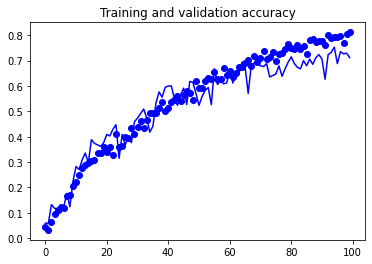

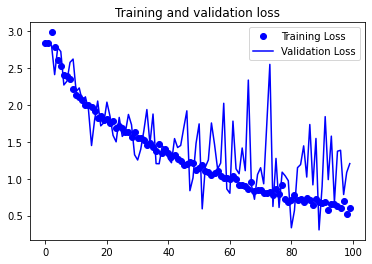

In [0]:
#visualisation with 10 epochs 

import matplotlib.pyplot as plt
acc = history_aug2.history['acc']
val_acc = history_aug2.history['val_acc']
loss = history_aug2.history['loss']
val_loss = history_aug2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_datagen = ImageDataGenerator(rescale=1/255) 

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224,224),
        batch_size=20,
        class_mode='categorical')

Found 340 images belonging to 17 classes.


In [0]:
model_VGG16_aug3.evaluate(
      test_generator)

17/17 [==============================] - 130s 8s/step


[0.4543994963169098, 0.800000011920929]